In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
usdc_df = pd.read_csv(Path('../../resources/prices/coin_USDCoin.csv'), index_col='SNo')
usdc_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,USD Coin,USDC,2018-10-09 23:59:59,1.008330,1.000030,1.004270,1.006860,1.088030e+05,0.000000e+00
2,USD Coin,USDC,2018-10-10 23:59:59,1.019080,1.003970,1.004940,1.009620,7.117830e+05,0.000000e+00
3,USD Coin,USDC,2018-10-11 23:59:59,1.031230,1.001730,1.009940,1.009780,4.177290e+06,0.000000e+00
4,USD Coin,USDC,2018-10-12 23:59:59,1.018710,1.001140,1.008610,1.012720,1.322240e+06,0.000000e+00
5,USD Coin,USDC,2018-10-13 23:59:59,1.020290,1.003550,1.014450,1.007430,6.985070e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...
869,USD Coin,USDC,2021-02-23 23:59:59,1.001702,0.999658,1.000021,1.000221,4.522386e+09,7.981667e+09
870,USD Coin,USDC,2021-02-24 23:59:59,1.003368,0.999824,1.000019,1.000229,2.427751e+09,8.132862e+09
871,USD Coin,USDC,2021-02-25 23:59:59,1.000710,0.999959,1.000220,1.000072,2.301652e+09,8.328440e+09


In [3]:
usdc_df['Date'] = pd.to_datetime(usdc_df['Date']).dt.date
usdc_df['Date'] = pd.to_datetime(usdc_df['Date'])
usdc_df['Spread'] = usdc_df.High - usdc_df.Low
usdc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 1 to 873
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       873 non-null    object        
 1   Symbol     873 non-null    object        
 2   Date       873 non-null    datetime64[ns]
 3   High       873 non-null    float64       
 4   Low        873 non-null    float64       
 5   Open       873 non-null    float64       
 6   Close      873 non-null    float64       
 7   Volume     873 non-null    float64       
 8   Marketcap  873 non-null    float64       
 9   Spread     873 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 75.0+ KB


## Plot the closing value of USDC over time

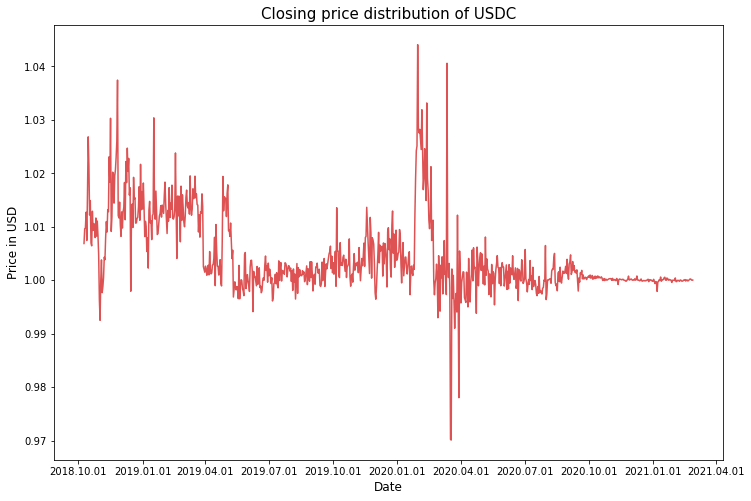

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = usdc_df.Close.values, x=usdc_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = usdc_df.Close.values, x=usdc_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of USDC", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

usdc_df['Date_mpl'] = usdc_df['Date'].apply(lambda x: mdates.date2num(x))

temp_usdc_df = usdc_df.copy(deep=False)
temp_usdc_df = temp_usdc_df.set_index(['Date'])
temp_usdc_df = temp_usdc_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_usdc_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2018-10-09,1.008330,1.000030,1.004270,1.006860,1.088030e+05,17813.0
2018-10-10,1.019080,1.003970,1.004940,1.009620,7.117830e+05,17814.0
2018-10-11,1.031230,1.001730,1.009940,1.009780,4.177290e+06,17815.0
2018-10-12,1.018710,1.001140,1.008610,1.012720,1.322240e+06,17816.0
2018-10-13,1.020290,1.003550,1.014450,1.007430,6.985070e+05,17817.0
...,...,...,...,...,...,...
2021-02-23,1.001702,0.999658,1.000021,1.000221,4.522386e+09,18681.0
2021-02-24,1.003368,0.999824,1.000019,1.000229,2.427751e+09,18682.0
2021-02-25,1.000710,0.999959,1.000220,1.000072,2.301652e+09,18683.0


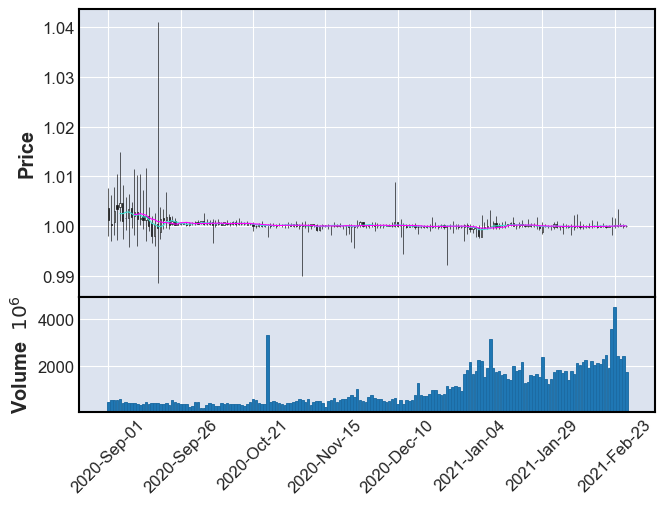

In [6]:
mpf.plot(temp_usdc_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_USDCoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE,
                               parse_dates=['Date'],
                               usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,1.000033,0.999416,1.000636
183,2021-03-03 23:59:59,0.999813,0.999165,1.000435
184,2021-03-04 23:59:59,0.999902,0.999211,1.000559
185,2021-03-05 23:59:59,1.000023,0.999247,1.000714
186,2021-03-06 23:59:59,1.000102,0.999280,1.000863


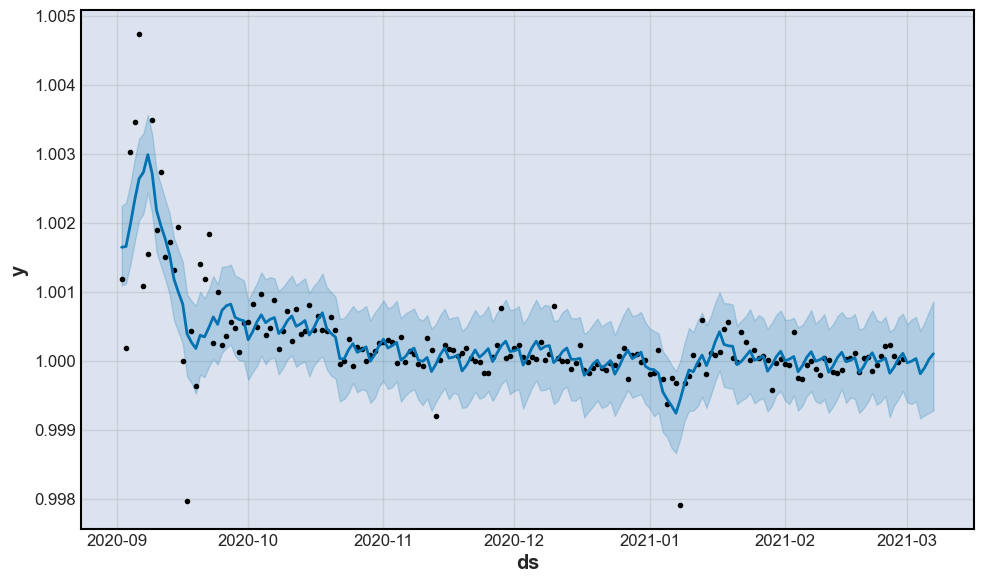

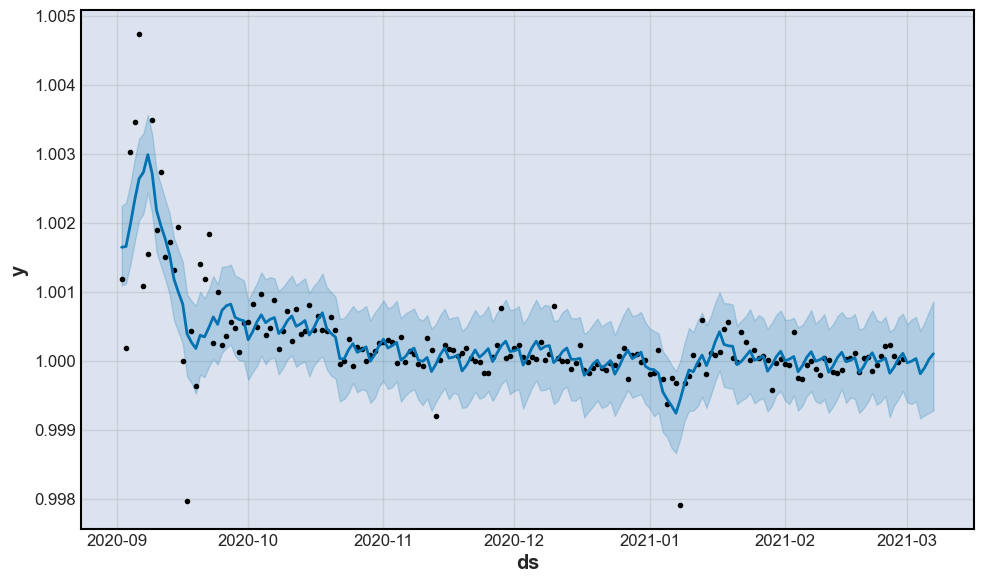

In [9]:
m.plot(forecast)

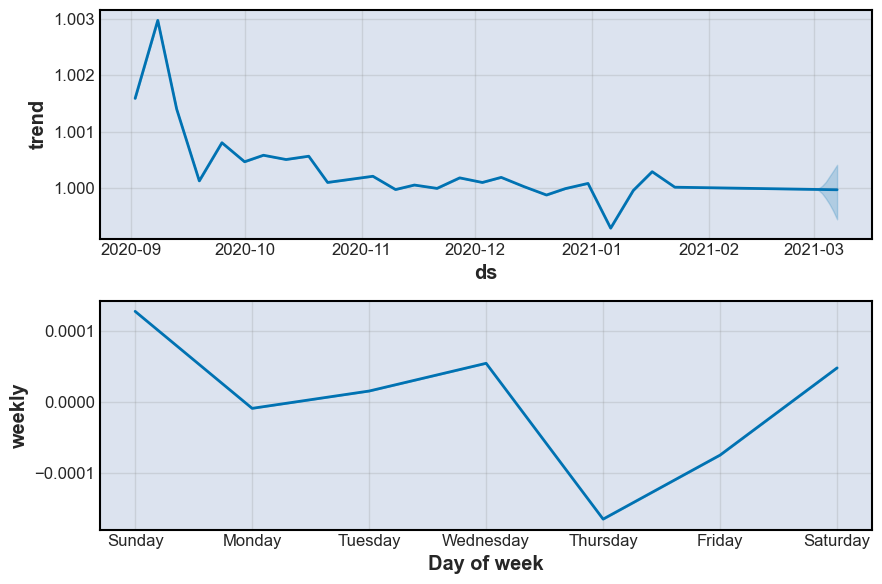

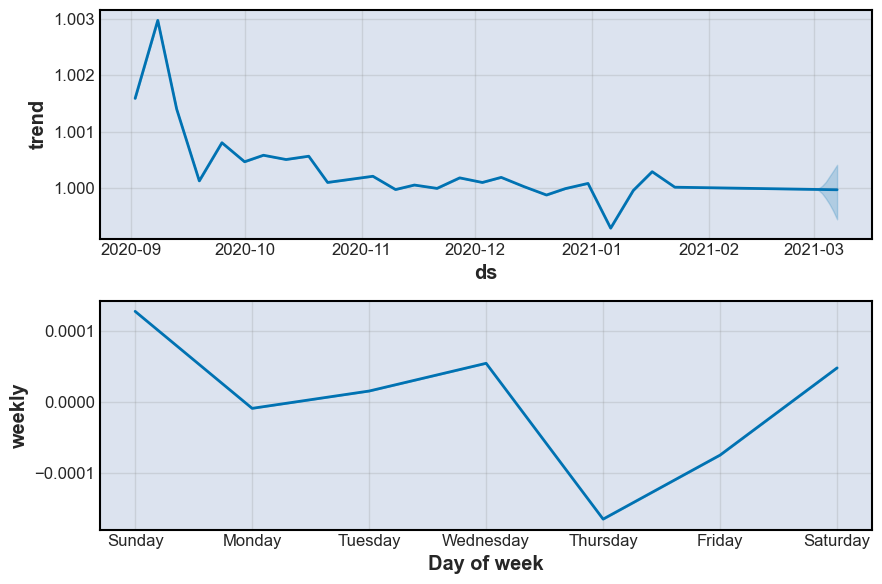

In [10]:
m.plot_components(forecast)